## 1. Understanding Data

In [ ]:
import os
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

### Before Start
본격적으로 시작하기 전에 데이터에 대해서 아주 약간만 깊이 있게 이해해보는 시간을 가져보려고 합니다.

### Q. 디스크의 CSV파일의 용량은 그렇게 높진 않은데 메모리로 읽기만 하면 몇 배로 늘어나는 이유는?
캐글을 하시다 보면 이런 경험이 한번쯤은 다들 있으실 것 같습니다.   
분명히 CSV 파일로는 1GB 보다 아래였는데 판다스로 read를 하면 2~3GB로 늘어나는 경우가 종종 있는데, 이유가 무엇일까요?

In [ ]:
## Toxic competition data load
# PATH = '../input/jigsaw-unintended-bias-in-toxicity-classification'

In [ ]:
# os.listdir('PATH')

In [ ]:
# toxic_train = pd.read_csv(os.path.join(PATH, 'train.csv'))
# # toxic_train = pd.read_csv('../input/jigsaw-unintended-bias-in-toxicity-classification/train.csv')
# toxic_train.info()

### Load data

In [ ]:
# PATH = '../input/kakr-4th-competition/'
# train = pd.read_csv(PATH + 'train.csv')
# test  = pd.read_csv(PATH + 'test.csv')

train = pd.read_csv('~/Downloads/kakr-4th-competition/train.csv')
test = pd.read_csv('~/Downloads/kakr-4th-competition/test.csv')

### 데이터 확인

* id
* age : 나이
* workclass : 고용 형태
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
* education : 교육 수준
* education_num : 교육 수준 수치
* marital_status: 결혼 상태
* occupation : 업종
* relationship : 가족 관계
* race : 인종
* sex : 성별
* capital_gain : 양도 소득
* capital_loss : 양도 손실
* hours_per_week : 주당 근무 시간
* native_country : 국적
* income : 수익 (예측해야 하는 값)
    * \>50K : 1
    * <=50K : 0

In [ ]:
train['income'].value_counts()

<=50K    19744
>50K      6305
Name: income, dtype: int64

In [ ]:
train[train['capital_gain'] < train['capital_loss']]['income'].value_counts()

>50K     628
<=50K    598
Name: income, dtype: int64

In [ ]:
train[train['capital_loss'] == 0]['income'].value_counts()

<=50K    19146
>50K      5677
Name: income, dtype: int64

In [ ]:
train[train['capital_gain'] == 0]['income'].value_counts()

<=50K    18927
>50K      4929
Name: income, dtype: int64

In [ ]:
train.race.value_counts()

White                 22315
Black                  2476
Asian-Pac-Islander      800
Amer-Indian-Eskimo      254
Other                   204
Name: race, dtype: int64

In [ ]:
train.head()
train.sample(10) #임의의 테이블을 추출함 

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,more_50
19136,19136,25,Private,111243,HS-grad,9,Never-married,Sales,Other-relative,White,Female,0,0,50,United-States,<=50K,True
22923,22923,65,Self-emp-not-inc,111483,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2174,10,United-States,>50K,False
17191,17191,40,Private,382499,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,50,United-States,<=50K,True
20474,20474,41,Private,197583,10th,6,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,>50K,False
64,64,46,Private,241844,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K,True
699,699,47,Private,278322,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K,False
5679,5679,37,Private,176293,Some-college,10,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0,0,30,United-States,<=50K,True
1108,1108,43,Private,176138,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K,True
1934,1934,25,Private,32276,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,28,United-States,<=50K,True
9608,9608,34,Private,176831,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,>50K,False


### Pandas 라이브러리
Pandas 라이브러리에서 많이 쓰이는 것들을 위주로 살펴보도록 하겠습니다.

loc, iloc, info, describe, value_counts, head, tail, sample, map, apply, groupby 등

In [ ]:
## 판다스 사용 팁
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [ ]:
# 시리즈와 데이터프레임별로 다른 함수를 써야함
# 예약어와 컬럼명이 동일한 경우에는 []로 써야함 
print(type(train.native_country))
train.native_country.value_counts()

<class 'pandas.core.series.Series'>


United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Columbia                         52
Guatemala                        52
Italy                            50
Vietnam                          50
Dominican-Republic               48
Japan                            47
Poland                           47
Taiwan                           39
Haiti                            35
Iran                             35
Portugal                         30
Nicaragua                        28
Peru                             26
Greece                      

In [ ]:
train.groupby('native_country').mean().style.background_gradient(cmap='coolwarm')

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
native_country,,,,,,,
?,12774.982456,38.182018,195596.399123,10.605263,1980.853070,118.831140,40.947368
Cambodia,12427.642857,37.142857,186718.571429,9.000000,1394.928571,134.000000,41.071429
Canada,13141.195652,42.945652,181991.597826,10.586957,1540.880435,145.467391,41.510870
China,13837.087719,42.473684,178167.070175,10.684211,431.596491,160.473684,37.807018
Columbia,14270.557692,39.865385,220679.730769,9.346154,204.923077,30.807692,38.942308
Cuba,12148.473684,46.302632,244296.171053,9.578947,459.039474,87.552632,39.947368
Dominican-Republic,13489.125000,37.208333,192076.020833,7.604167,2152.583333,0.000000,41.937500
Ecuador,11742.666667,37.250000,188543.041667,9.416667,615.541667,0.000000,40.416667
El-Salvador,14109.835443,33.569620,252042.278481,6.734177,398.101266,21.759494,37.050633


In [ ]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [ ]:
train.groupby('workclass').mean().style.background_gradient()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
workclass,,,,,,,
?,12735.195739,41.219707,187093.543276,9.293609,615.042610,63.337550,32.068575
Federal-gov,12964.962092,42.645752,183719.874510,11.009150,805.257516,109.596078,41.154248
Local-gov,12911.864657,41.797872,188577.967494,11.030142,985.520686,107.162530,41.109338
Never-worked,14399.166667,19.000000,234209.000000,7.166667,0.000000,0.000000,26.500000
Private,13049.821939,36.756387,193592.115158,9.887932,901.189759,81.952381,40.287039
Self-emp-inc,12851.451539,46.123147,174538.315849,11.158495,4907.743444,154.050171,48.866591
Self-emp-not-inc,13332.364532,44.935468,175176.750246,10.227586,1829.109360,114.227094,44.409852
State-gov,12751.769895,39.306807,187929.465005,11.364334,737.906999,69.847555,38.975072
Without-pay,13182.181818,46.909091,185711.090909,9.545455,620.909091,0.000000,32.363636


In [ ]:
train.capital_gain.describe()

count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      99999.00000
Name: capital_gain, dtype: float64

In [ ]:
train.groupby('education').mean()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
education,,,,,,,
10th,12911.547196,37.512996,199553.160055,6.0,505.715458,62.142271,37.268126
11th,12706.079176,32.188720,194973.831887,7.0,228.366594,54.353579,33.510846
12th,12901.559889,32.116992,201529.947075,8.0,264.788301,29.746518,35.685237
1st-4th,13950.940299,45.753731,239230.843284,2.0,130.395522,44.328358,39.194030
5th-6th,13580.520755,42.898113,232939.135849,3.0,137.377358,67.116981,38.973585
7th-8th,12857.887129,47.833663,191626.629703,4.0,221.958416,76.386139,39.566337
9th,12889.000000,41.287081,202413.870813,5.0,387.770335,31.545455,37.901914
Assoc-acdm,12577.627078,37.336105,196665.033254,12.0,723.747031,84.837292,40.496437
Assoc-voc,12976.509124,38.542883,183072.597628,11.0,709.468066,69.258212,41.704380


In [ ]:
train.income.value_counts()

<=50K    19744
>50K      6305
Name: income, dtype: int64

In [ ]:
more_50_df = train.loc[train.income == '>50K', : ]

more_50_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6305 entries, 0 to 26043
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6305 non-null   int64 
 1   age             6305 non-null   int64 
 2   workclass       6305 non-null   object
 3   fnlwgt          6305 non-null   int64 
 4   education       6305 non-null   object
 5   education_num   6305 non-null   int64 
 6   marital_status  6305 non-null   object
 7   occupation      6305 non-null   object
 8   relationship    6305 non-null   object
 9   race            6305 non-null   object
 10  sex             6305 non-null   object
 11  capital_gain    6305 non-null   int64 
 12  capital_loss    6305 non-null   int64 
 13  hours_per_week  6305 non-null   int64 
 14  native_country  6305 non-null   object
 15  income          6305 non-null   object
 16  more_50         6305 non-null   bool  
dtypes: bool(1), int64(7), object(9)
memory usage: 843.5

In [ ]:
less_50_df = train.loc[train.income != '>50K', : ]

less_50_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19744 entries, 1 to 26048
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              19744 non-null  int64 
 1   age             19744 non-null  int64 
 2   workclass       19744 non-null  object
 3   fnlwgt          19744 non-null  int64 
 4   education       19744 non-null  object
 5   education_num   19744 non-null  int64 
 6   marital_status  19744 non-null  object
 7   occupation      19744 non-null  object
 8   relationship    19744 non-null  object
 9   race            19744 non-null  object
 10  sex             19744 non-null  object
 11  capital_gain    19744 non-null  int64 
 12  capital_loss    19744 non-null  int64 
 13  hours_per_week  19744 non-null  int64 
 14  native_country  19744 non-null  object
 15  income          19744 non-null  object
 16  more_50         19744 non-null  bool  
dtypes: bool(1), int64(7), object(9)
memory usage: 2.6+

(array([  18.,   29.,   75.,   55.,   26., 2454.,  280., 2020.,  774.,
         574.]),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ]),
 <BarContainer object of 10 artists>)

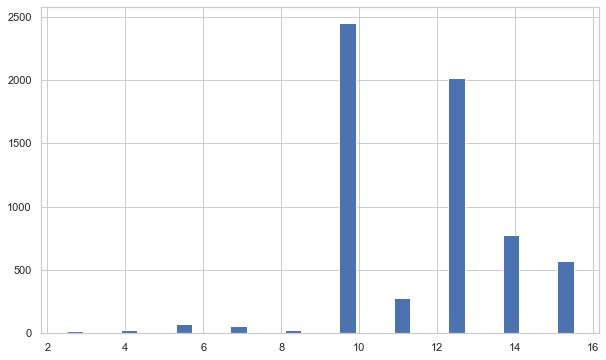

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
plt.hist(
    'education_num',
    histtype='bar',
    align='mid',
    orientation='vertical',    
    data=more_50_df, rwidth=0.3
)

In [ ]:
more_50_df.convert_dtypes()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,more_50
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,False
6,6,43,State-gov,206139,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K,False
8,8,47,Private,230136,HS-grad,9,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,60,United-States,>50K,False
9,9,41,Private,153031,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,65,United-States,>50K,False
16,16,32,Private,195000,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,45,United-States,>50K,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26026,26026,39,Private,176186,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,False
26027,26027,55,Private,227856,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,60,United-States,>50K,False
26028,26028,30,State-gov,218640,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,United-States,>50K,False
26033,26033,39,Private,224531,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,>50K,False


In [ ]:
more_50_df.education_num.value_counts()

13    1805
9     1337
10    1117
14     774
15     342
11     280
16     232
12     215
7       55
6       53
4       29
8       26
5       22
3       13
2        5
Name: education_num, dtype: int64

In [ ]:
age = train.age.values
list(age)

[40,
 17,
 18,
 21,
 24,
 43,
 43,
 37,
 47,
 41,
 34,
 21,
 44,
 18,
 50,
 39,
 32,
 54,
 50,
 39,
 21,
 39,
 26,
 29,
 53,
 31,
 50,
 21,
 46,
 23,
 20,
 26,
 26,
 37,
 31,
 39,
 41,
 22,
 27,
 51,
 18,
 57,
 25,
 76,
 38,
 51,
 25,
 47,
 41,
 47,
 47,
 41,
 66,
 64,
 47,
 51,
 50,
 40,
 32,
 37,
 51,
 58,
 45,
 52,
 46,
 41,
 67,
 65,
 35,
 22,
 35,
 22,
 32,
 17,
 19,
 29,
 64,
 50,
 19,
 43,
 24,
 52,
 17,
 39,
 68,
 34,
 47,
 25,
 32,
 28,
 40,
 54,
 24,
 32,
 33,
 47,
 24,
 68,
 36,
 50,
 35,
 63,
 62,
 34,
 45,
 42,
 42,
 39,
 59,
 31,
 47,
 22,
 49,
 28,
 30,
 30,
 19,
 53,
 56,
 20,
 44,
 45,
 27,
 30,
 25,
 21,
 19,
 35,
 35,
 33,
 20,
 24,
 33,
 36,
 48,
 61,
 38,
 46,
 23,
 29,
 25,
 22,
 50,
 43,
 43,
 25,
 30,
 60,
 27,
 45,
 36,
 40,
 17,
 26,
 64,
 25,
 50,
 28,
 25,
 30,
 28,
 53,
 30,
 19,
 23,
 28,
 28,
 40,
 55,
 21,
 27,
 58,
 45,
 28,
 21,
 28,
 37,
 33,
 37,
 57,
 28,
 36,
 58,
 33,
 37,
 50,
 27,
 18,
 32,
 72,
 47,
 19,
 55,
 56,
 56,
 46,
 29,
 20,
 18,
 40,


In [ ]:
train.fnlwgt.value_counts()

203488    11
123011    10
121124    10
126675    10
117963    10
          ..
177839     1
519627     1
157599     1
200360     1
125489     1
Name: fnlwgt, Length: 18422, dtype: int64

In [ ]:
train.relationship.value_counts()

Husband           10541
Not-in-family      6632
Own-child          4099
Unmarried          2740
Wife               1260
Other-relative      777
Name: relationship, dtype: int64

In [ ]:
train.marital_status.value_counts()

Married-civ-spouse       11970
Never-married             8568
Divorced                  3536
Separated                  826
Widowed                    796
Married-spouse-absent      334
Married-AF-spouse           19
Name: marital_status, dtype: int64

In [ ]:
pd.pivot_table(train[['marital_status','income']], index=['marital_status'], aggfunc='count')

,income
marital_status,
Divorced,3536
Married-AF-spouse,19
Married-civ-spouse,11970
Married-spouse-absent,334
Never-married,8568
Separated,826
Widowed,796


In [ ]:
more_50_df.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,6305.000000,6305.000000,6.305000e+03,6305.000000,6305.000000,6305.000000,6305.000000
mean,13081.890246,44.116416,1.888982e+05,11.608565,4033.446630,196.574306,45.555908
std,7532.130160,10.514331,1.023330e+05,2.379452,14538.895521,596.801894,11.000797
min,0.000000,19.000000,1.487800e+04,2.000000,0.000000,0.000000,1.000000
25%,6531.000000,36.000000,1.199390e+05,10.000000,0.000000,0.000000,40.000000
50%,13122.000000,43.000000,1.767560e+05,13.000000,0.000000,0.000000,40.000000
75%,19658.000000,51.000000,2.313480e+05,13.000000,0.000000,0.000000,50.000000
max,26043.000000,90.000000,1.226583e+06,16.000000,99999.000000,3683.000000,99.000000


In [ ]:
more_50_df.groupby('race').sum()


,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,more_50
race,,,,,,,,
Amer-Indian-Eskimo,341256,1148,3762302,321,122528,5026,1317,0
Asian-Pac-Islander,2726518,9024,36113826,2672,1164260,46618,9843,0
Black,3860101,13322,73329378,3332,1096305,47811,13438,0
Other,200493,751,3589184,202,220552,1887,850,0
White,75352950,253909,1074208463,66665,22827236,1138059,261782,0


In [ ]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [ ]:
train.occupation.value_counts()

Prof-specialty       3304
Craft-repair         3262
Exec-managerial      3246
Sales                2998
Adm-clerical         2983
Other-service        2626
Machine-op-inspct    1582
?                    1508
Transport-moving     1270
Handlers-cleaners    1092
Farming-fishing       784
Tech-support          742
Protective-serv       522
Priv-house-serv       123
Armed-Forces            7
Name: occupation, dtype: int64

In [ ]:
train.income.value_counts()

<=50K    19744
>50K      6305
Name: income, dtype: int64

### 결측값 존재 컬럼

 2   workclass       26049 non-null  object
 7   occupation      26049 non-null  object
 14  native_country  26049 non-null  object

 8   relationship    Other-relative 

In [ ]:
train.capital_gain > 9999

0        False
1        False
2        False
3        False
4        False
         ...  
26044    False
26045    False
26046    False
26047    False
26048    False
Name: capital_gain, Length: 26049, dtype: bool

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


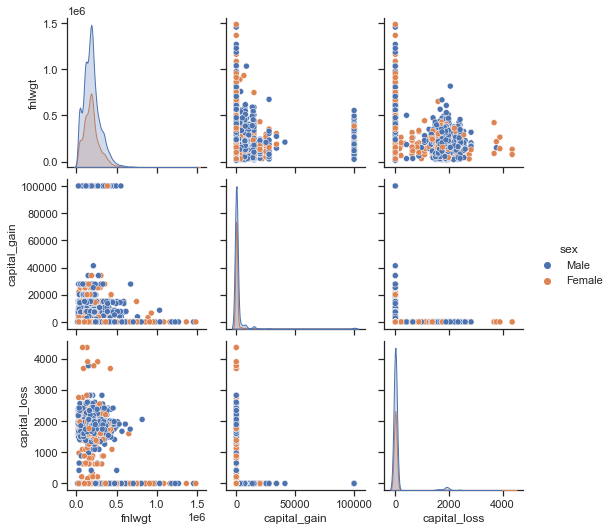

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

df = pd.DataFrame(data=train[['fnlwgt', 'education', 'capital_gain', 'capital_loss', 'sex']])
sns.pairplot(df, hue='sex')

TypeError: plot got an unexpected keyword argument 'x'

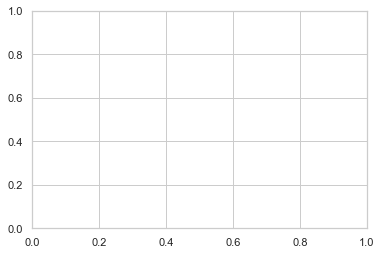

In [ ]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)

ax = plt.plot(x=train.education, y=train.sex)

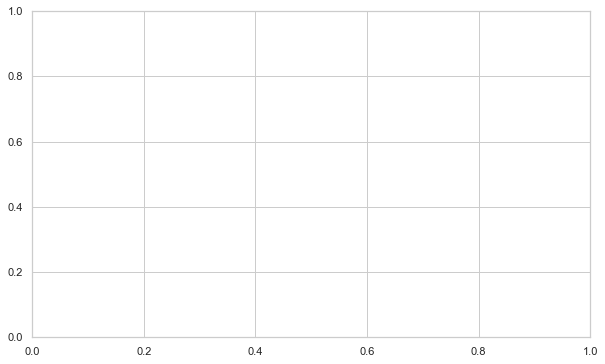

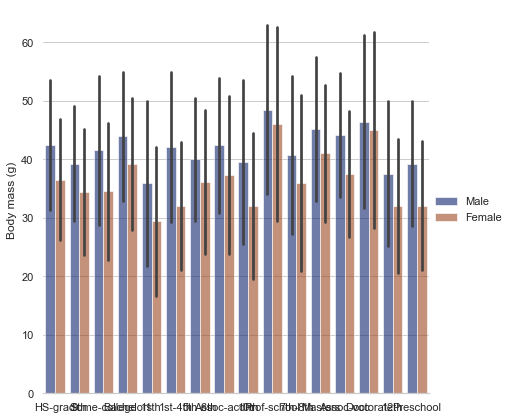

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(10, 6))
# sns.set_theme(style="whitegrid")

fig = sns.catplot
ax = sns.catplot(
    data=train, kind="bar",
    x="education", y="hours_per_week", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
ax.despine(left=True)
ax.set_axis_labels("", "Body mass (g)")
ax.legend.set_title("")

TypeError: list indices must be integers or slices, not str

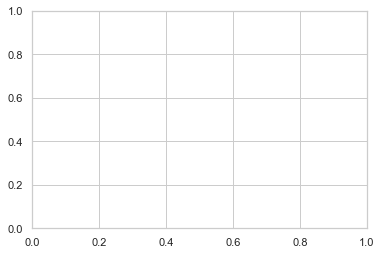

In [ ]:
boxplot = plt.figure()
ax = boxplot.add_subplot(1,1,1)
ax.boxplot([[train['sex']=='Female']['hours_per_week'],
          [train['sex']=='Male']['hours_per_week']],
           labels = ['Female', 'Male'])
ax.set_xlabel('Sex')
ax.set_ylabel('hours_per_week')

In [ ]:
# loc의 조건문이 true, false 의 형태로 출력되면 다 가능 
# train.loc[train.capital_gain == 99999, : 'age']

train.loc[train.race =='White', : ]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
6,6,43,State-gov,206139,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26042,26042,48,Self-emp-not-inc,191389,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,50,United-States,<=50K
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K


In [ ]:
x = '>50K'
x== '50K'

False

In [ ]:
# 데이터 변환 : map 사용하기(시리즈 함수임) 함수/조건을 적용하여 바로 변환시키 임
# 비슷한 apply 는 df 에 사용함 
train.income = train.income.map(lambda x: int(x=='>50K')) # 블린추출하여 0, 1로 변환 
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,0
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,0
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,0


In [ ]:
train.apply(lambda x : x['age']+ x['hours_per_week'], axis=1)
# axis는 축을 나타냄. train.shape를 기준으로 두개의 축을 나누는데, 컬럼의 경우 axis를 1로 설정한다. 

0        100
1         37
2         34
3         46
4         44
        ... 
26044    109
26045     63
26046     93
26047     66
26048     50
Length: 26049, dtype: int64

KeyboardInterrupt: 

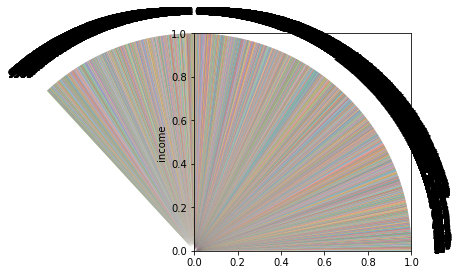

In [ ]:
# train.income.plot(kind='pie')

In [ ]:
train.income.plot(kind='hist')

TypeError: no numeric data to plot

## 2. Data Preprocessing

### 2.1 결측치 처리

In [1]:
train.isna().sum()

NameError: ignored

In [2]:
train[train.apply(lambda x: "?" in list(x), axis=1)] # fearture에 ?가 포함된 row 만 추출 

NameError: ignored

In [ ]:
train.workclass.value_counts()

In [ ]:
train.occupation.value_counts()

### 결측치 처리
삭제? 대치?

결측치 대치의 경우 overffiing의 문제가 있을 수 있음.
데이터 자체가 많으면 문제되지 않음

outlier 처리 방법
-삭제,대치, 로그 변환(log transformation)

In [ ]:
train[(train['workclass'] == '?')&(train['occupation'] == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,more_50
11,11,21,?,204226,Some-college,10,Never-married,?,Unmarried,White,Female,0,0,35,United-States,<=50K,True
30,30,20,?,202994,Some-college,10,Never-married,?,Own-child,White,Female,0,0,16,United-States,<=50K,True
34,34,31,?,505438,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,Mexico,<=50K,True
66,66,67,?,39100,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,5,United-States,<=50K,True
67,67,65,?,404601,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,2414,0,30,United-States,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26009,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,<=50K,True
26010,26010,63,?,321403,9th,5,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K,True
26012,26012,36,?,214896,9th,5,Divorced,?,Unmarried,White,Female,0,0,40,Mexico,<=50K,True
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K,True


In [ ]:
train[(train['workclass'] != '?')&(train['occupation'] == '?')]

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,more_50
7929,7929,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K,True
8698,8698,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K,True
13008,13008,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K,True
15076,15076,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K,True
17531,17531,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,True
24153,24153,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K,True


In [ ]:
train[(train['workclass'] == '?')&(train['occupation'] != '?')]


,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,more_50,log_capital_gain


In [ ]:
train.native_country.value_counts()

United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Columbia                         52
Guatemala                        52
Italy                            50
Vietnam                          50
Dominican-Republic               48
Japan                            47
Poland                           47
Taiwan                           39
Haiti                            35
Iran                             35
Portugal                         30
Nicaragua                        28
Peru                             26
Greece                      

In [ ]:
train.loc[(train.age >= 30) & (train.workclass =='?'), 'workclass'] = 'No'

train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
State-gov            1043
Self-emp-inc          877
No                    868
Federal-gov           765
?                     634
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

### Null check 관련 팁
데이터를 일일이 다 확인하지 않고 결측치가 있는지 확인하는 방법은?

In [ ]:
train.info()
# null 값을 포함하는 컬럼은 dtype이 float타입인 경우가 많다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
 16  more_50         26049 non-null  bool  
dtypes: bool(1), int64(7), object(9)
memory usage: 3.2+

In [ ]:
# f string 사용하기 f"{}"

a = 2/7
f"a 값은 : {a:.30f}"  # floating point가 넘어가면, 컴퓨터는 임의의수로 나머지를 매꾸기때문에 
# float 변수를 sort하는 경우에 값이 계속 바뀌면서 순서가 바뀔수 있음. 

'a 값은 : 0.285714285714285698425385362498'

### 2.2 이상치 처리
수치형 데이터에 이상한 값이 없는지 한번 확인해보도록 하겠습니다.

In [ ]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [ ]:
train.loc[train.capital_gain== 99999, 'income'].count()

127

In [ ]:
# pd.Series.sort_values?

In [ ]:
train.loc[train.capital_gain< 99999].sort_values('capital_gain', ascending=False)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,more_50
13280,13280,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K,True
12625,12625,19,Private,188815,HS-grad,9,Never-married,Other-service,Own-child,White,Female,34095,0,20,United-States,<=50K,True
2893,2893,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,True
17707,17707,20,?,273701,Some-college,10,Never-married,?,Other-relative,Black,Male,34095,0,10,United-States,<=50K,True
4703,4703,55,Self-emp-not-inc,145574,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,34095,0,60,United-States,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,9047,48,Private,180446,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K,True
9046,9046,28,Private,273269,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,<=50K,True
9045,9045,36,Self-emp-not-inc,34180,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,70,United-States,>50K,False
9044,9044,23,?,283806,9th,5,Divorced,?,Not-in-family,White,Female,0,0,35,United-States,<=50K,True


### log 표현

In [ ]:
train.capital_gain.map(lambda x: np.log(x, where=(x!=0))).describe()

count    26049.000000
mean         0.743290
std          2.468766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.512915
Name: capital_gain, dtype: float64

In [ ]:
train['log_capital_gain']= train.capital_gain.map(lambda x : np.log(x, where=(x!=0)))

train[['capital_gain', 'log_capital_gain']].describe()

,capital_gain,log_capital_gain
count,26049.00000,26049.000000
mean,1087.68970,0.743290
std,7388.85469,2.468766
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,0.00000,0.000000
max,99999.00000,11.512915


### 2.3 Scaling

Min-max Scaler: (정규화 Normalization)
범위가 정해진 값이 필요할 때  
아웃라이어에 민감함
-최대가 1, 최소가 0 (0부터 1사이의 범위를 출력, 음수가 없음)

  
Standard Scaler: (표준화 Standardizaton)
평균을 0, 표준편차를 1로 맞추어 정규분포의 특성을 가지도록 만듦  
아웃라이어에 영향을 덜 받음

스케일링은 뭘 쓰야할까? 정답은 없다. 둘다 해보야지

### Data leakage(데이터 누수)

test data는 미래의 데이터라고 가정하며, 미래 데이터는 아직 일어나지 않은 데이터이므로, test데이터를 쓰는 것 자체가 데이터 누수를 일으킨다. 
오버피팅의 가능성을 고려하여 일반화를 신경쓴다. 따라서 스케일은 train에만 fit하고, test 데이터에는 transform 한다. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

# fit 적용해서 통계치를 구한다. fit을 할때 통계치가 갱신되기 떄문에, 두가지 스케일 방법을 순차적으로 사용할수 있다. 
# transform 결과를 출력한다.

In [ ]:
mm_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))

array([[0.10521804],
       [0.05972864],
       [0.23086592],
       ...,
       [0.10328458],
       [0.0937206 ],
       [0.05854911]])

In [ ]:
print(train['fnlwgt'].values)
train['fnlwgt'].values.shape

[168538 101626 353358 ... 165694 151626  99891]


(26049,)

In [ ]:
print(mm_scaler.data_max_)
print(mm_scaler.data_min_)

[1484705.]
[13769.]


In [ ]:
train['MM_fnlwgt'] = mm_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['MM_fnlwgt'] = mm_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['MM_age'] = mm_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['MM_age'] = mm_scaler.transform(test['age'].values.reshape(-1,1))

train['ST_fnlwgt'] = st_scaler.fit_transform(train['fnlwgt'].values.reshape(-1,1))
test['ST_fnlwgt'] = st_scaler.transform(test['fnlwgt'].values.reshape(-1,1))

train['ST_age'] = st_scaler.fit_transform(train['age'].values.reshape(-1,1))
test['ST_age'] = st_scaler.transform(test['age'].values.reshape(-1,1))

In [ ]:
train.describe()[['MM_fnlwgt', 'MM_age']]

,MM_fnlwgt,MM_age
count,26049.000000,26049.000000
mean,0.120016,0.295469
std,0.072040,0.187281
min,0.000000,0.000000
25%,0.070934,0.150685
50%,0.112239,0.273973
75%,0.152261,0.424658
max,1.000000,1.000000


In [ ]:
train.describe()[['ST_fnlwgt', 'ST_age']].round(6)

,ST_fnlwgt,ST_age
count,26049.000000,26049.000000
mean,-0.000000,-0.000000
std,1.000019,1.000019
min,-1.665991,-1.577710
25%,-0.681329,-0.773101
50%,-0.107947,-0.114784
75%,0.447609,0.689826
max,12.215444,3.761972


## 3. Feature Engineering

### 3.1 변수의 종류
변수 종류에 따라서 어떤 차이점이 있는지 살펴봅시다.

모든 데이터를 설명할 수 있는 독립변수. 

domain knowledge(기초 데이터에 대한 이해)를 사용하여 한다. 

In [ ]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,capital_loss,hours_per_week,native_country,income,more_50,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,60,United-States,>50K,False,1.396125e-309,0.105218,0.315068,-0.205413,0.104655
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0,20,United-States,<=50K,True,0.000000e+00,0.059729,0.000000,-0.836872,-1.577710
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0,16,United-States,<=50K,True,0.000000e+00,0.230866,0.013699,1.538759,-1.504564
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0,25,United-States,<=50K,True,0.000000e+00,0.093402,0.054795,-0.369431,-1.285125
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0,20,?,<=50K,True,0.000000e+00,0.073739,0.095890,-0.642391,-1.065686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,...,0,52,United-States,<=50K,True,0.000000e+00,0.160736,0.547945,0.565252,1.348143
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,...,0,40,United-States,<=50K,True,0.000000e+00,0.152504,0.082192,0.450978,-1.138832
26046,26046,78,No,165694,Masters,14,Widowed,?,Not-in-family,White,...,0,15,United-States,<=50K,True,0.000000e+00,0.103285,0.835616,-0.232253,2.884216
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,...,0,40,United-States,<=50K,True,0.000000e+00,0.093721,0.123288,-0.365014,-0.919393


### 3.2 인코딩
알고리즘이 이해하기 어려운 Feature들을 어떻게 처리할 지 알아봅시다

컴퓨터가 이해하는 데이터와 현실의 데이터가 모양은 같으나 의미가 다르고, 상황에 따라 순서나 세기가 바뀐다. 

- one-hot encoding: 카테고리형 변수에 사용, 변수별 상관관계가 없을 때 사용한다. 

- label encoding : 범주형 변수에서 순서가 있는 변수에 대해 사용. 

- mean encoding : target값의 비율(분포)를 바탕으로 특정 값을 매핑한다. (정보 자체로 대치한다.)
    * 오버피팅에 주의해야하며, 사이킷런에서 지원하지 않으며, 캐글에서 변칙적으로 가끔 사용된다. 

### 차원의 저주(Curse fo Dimensionality)

피처의 수가 많은데 비해 피처를 설명할 수 있는 row의 수가 부족할 때 발생한다. 

차원이 작을수록 성능이 좋은 것은 당연, 분포적 특성에서 없는 것이 나은 차원이 존재한다? 

차원을 줄여나가는 방법을 고려하자
- feature selection(특성 선택) : 여러 피처들 가운데 일부 피처를 선택 
    * greedy 알고리즘 사용
- feature extraction(특성 추출) : 주어진 피처를 바탕으로 새로운 피처로 재구성
    * PCA, LDA
    
- PCA의 이해
    * PCA는 고차원에서 분산이 가장 큰 차원을 찾는다. 분산의 과정을 분해하기 때문에, 고유값 중에서 분산이 큰 방향을 찾아 선택한다.
    - 라벨을 쓰지 않고 분산이 큰 것이 중요할 것이다라는 전제를 가지고 접근 
    - 공분산 분석에 대한 이해가 필요하다. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,capital_loss,hours_per_week,native_country,income,more_50,log_capital_gain,MM_fnlwgt,MM_age,ST_fnlwgt,ST_age
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,60,United-States,>50K,False,1.396125e-309,0.105218,0.315068,-0.205413,0.104655
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0,20,United-States,<=50K,True,0.000000e+00,0.059729,0.000000,-0.836872,-1.577710
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0,16,United-States,<=50K,True,0.000000e+00,0.230866,0.013699,1.538759,-1.504564
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0,25,United-States,<=50K,True,0.000000e+00,0.093402,0.054795,-0.369431,-1.285125
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0,20,?,<=50K,True,0.000000e+00,0.073739,0.095890,-0.642391,-1.065686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,...,0,52,United-States,<=50K,True,0.000000e+00,0.160736,0.547945,0.565252,1.348143
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,...,0,40,United-States,<=50K,True,0.000000e+00,0.152504,0.082192,0.450978,-1.138832
26046,26046,78,No,165694,Masters,14,Widowed,?,Not-in-family,White,...,0,15,United-States,<=50K,True,0.000000e+00,0.103285,0.835616,-0.232253,2.884216
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,...,0,40,United-States,<=50K,True,0.000000e+00,0.093721,0.123288,-0.365014,-0.919393


### Onehot encoder

In [ ]:
oe = OneHotEncoder()
oe_result = oe.fit_transform(train['workclass'].values.reshape(-1, 1)).toarray()

In [ ]:
oe_result.shape

(26049, 10)

In [ ]:
oe.get_feature_names(['workclass'])

array(['workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_No', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay'], dtype=object)

In [ ]:
sub = pd.DataFrame(data=oe_result, columns=oe.get_feature_names(['workclass']))

In [ ]:
pd.concat([train, sub], axis=1)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_No,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26046,26046,78,No,165694,Masters,14,Widowed,?,Not-in-family,White,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train = pd.read_csv('~/Downloads/kakr-4th-competition/train.csv')
pd.get_dummies(train)

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,0,40,168538,9,0,0,60,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,17,101626,5,0,0,20,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,18,353358,10,0,0,16,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,3,21,151158,10,0,0,25,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,24,122234,10,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,250201,7,0,0,52,0,0,0,...,0,0,0,0,0,1,0,0,1,0
26045,26045,23,238092,13,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,1,0
26046,26046,78,165694,14,0,0,15,1,0,0,...,0,0,0,0,0,1,0,0,1,0
26047,26047,26,151626,9,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Label encoder

In [ ]:
le = LabelEncoder()
le.fit_transform(train['workclass'].values.reshape(-1, 1))

array([4, 4, 4, ..., 0, 6, 0])

사이킷런 인코딩은 불편한점이 너무 많아서.. 직접 만드는 게 나을 수도 있습니다.

    - 순서를 정할 수 없다는 단점이 있음

In [ ]:
train['workclass'].unique()

array(['Private', 'State-gov', '?', 'Self-emp-not-inc', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
workclass_to_num= dict(zip(train['workclass'].unique(), [0,1,2,3,4,5,6,7,8,9]))

train['workclass'].map(workclass_to_num)

# 인코딩된 값의 실제 값을 구하고 싶을때는 workclass_to_num를 두개로 만들어서 비교하면 된다. 

0        0
1        0
2        0
3        0
4        0
        ..
26044    0
26045    0
26046    2
26047    3
26048    2
Name: workclass, Length: 26049, dtype: int64

### (Target) Mean Encoding

In [ ]:
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K


In [ ]:
male_positive = train.loc[train['sex']=='Male', "income"]
female_positive = train.loc[train['sex']=='Female', "income"]

In [ ]:
male_positive.value_counts() / male_positive.shape[0]

<=50K    0.693857
>50K     0.306143
Name: income, dtype: float64

In [ ]:
female_positive.value_counts() / female_positive.shape[0]

<=50K    0.888759
>50K     0.111241
Name: income, dtype: float64

### onehot 인코딩 일괄적으로 하는 간단한 방법~

In [ ]:
dummied = pd.get_dummies(train)

In [ ]:
dummied

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,0,40,168538,9,0,0,60,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,17,101626,5,0,0,20,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,18,353358,10,0,0,16,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,3,21,151158,10,0,0,25,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,24,122234,10,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,250201,7,0,0,52,0,0,0,...,0,0,0,0,0,1,0,0,1,0
26045,26045,23,238092,13,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,1,0
26046,26046,78,165694,14,0,0,15,1,0,0,...,0,0,0,0,0,1,0,0,1,0
26047,26047,26,151626,9,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### 3.3 PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60, svd_solver='full')

In [ ]:
dummied = dummied.drop(columns=['id', 'income_<=50K', 'income_>50K'])

In [ ]:
X_train_std =  st_scaler.fit_transform(dummied)
X_train_pca = pca.fit_transform(X_train_std)

# pca는 스케일을 하는 것을 권장
# 고유 벡터, 고유 값을 선정

In [ ]:
pca.explained_variance_
# 분산을 설명하는 고유값을 출력 
pca.components_.shape
# 분산을 몇개까지 잡을 것인가. 

(60, 107)

In [ ]:
X_train_pca

# 공분산 행렬을 구해 대체되는 과정을 거친다. 고유값에 따라 공분산 행렬을 추출 

array([[ 2.15104545,  1.10863836, -0.89692251, ...,  0.0590396 ,
         0.06308399, -0.36166509],
       [-1.82588016,  3.1441548 , -1.52213373, ..., -0.32314159,
        -0.18343577, -0.44857784],
       [-2.1404661 ,  1.32485889, -1.88436268, ..., -0.18708453,
         0.09141367,  0.09783785],
       ...,
       [-1.6781281 , -3.24235079,  1.50911091, ..., -0.27485239,
         0.2678334 ,  0.13183017],
       [-2.46116536, -0.67196355,  0.64926634, ...,  0.03788511,
        -0.27461167, -0.20737092],
       [-3.17066038, -0.44892892, -0.66250624, ..., -0.08734472,
        -0.0287194 , -0.27267377]])

In [ ]:
X_train_2 = X_train_std - X_train_std.mean(axis=0)

res = np.dot(X_train_2, pca.components_.T)
res

array([[ 2.15104545,  1.10863836, -0.89692251, ...,  0.0590396 ,
         0.06308399, -0.36166509],
       [-1.82588016,  3.1441548 , -1.52213373, ..., -0.32314159,
        -0.18343577, -0.44857784],
       [-2.1404661 ,  1.32485889, -1.88436268, ..., -0.18708453,
         0.09141367,  0.09783785],
       ...,
       [-1.6781281 , -3.24235079,  1.50911091, ..., -0.27485239,
         0.2678334 ,  0.13183017],
       [-2.46116536, -0.67196355,  0.64926634, ...,  0.03788511,
        -0.27461167, -0.20737092],
       [-3.17066038, -0.44892892, -0.66250624, ..., -0.08734472,
        -0.0287194 , -0.27267377]])

In [ ]:
np.allclose(X_train_pca, res)

True

## 4. Before Modeling
시간이 남는다면..

In [ ]:
앙상블의 부스팅 계열의 모델(트리기반은) 스케일링이 필요없다. 


SyntaxError: invalid syntax (<ipython-input-232-93cb4f9f5ded>, line 1)